In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [9]:
data = pd.read_csv('shopping_trends.csv')

## Data Preparation 

In [10]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [12]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [13]:
data.shape

(3900, 19)

In [14]:
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [15]:
data.duplicated().sum() 

0

## How frequent are customers across different age groups?

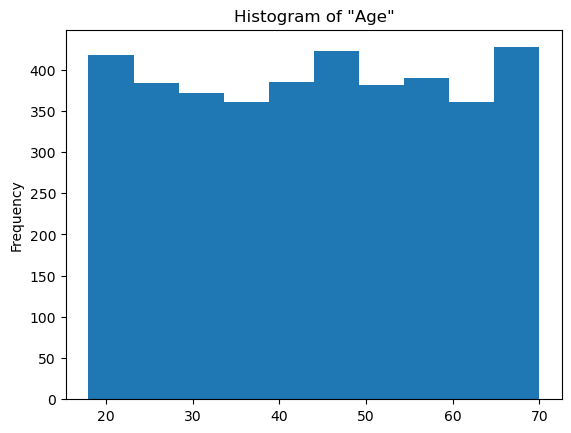

In [16]:
data['Age'].plot(kind ='hist')
plt.title('Histogram of "Age"')
plt.show()

In [17]:
data.columns 

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

## What is the breakdown of our customer base by gender, providing insights that can inform marketing strategies? 

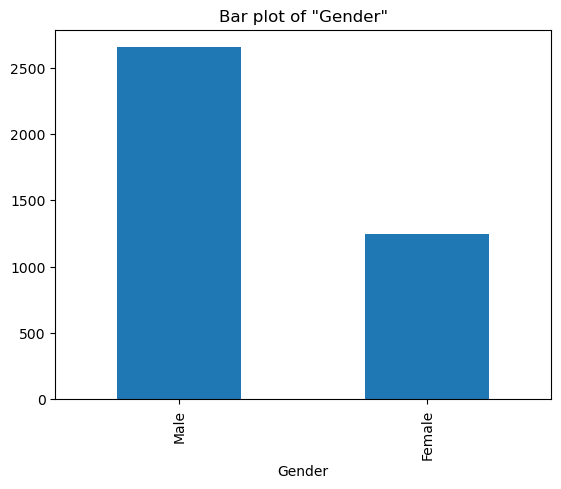

In [18]:
data['Gender'].value_counts().plot(kind = 'bar')
plt.title('Bar plot of "Gender"')
plt.show()

## Comparison of Review Ratings across different Genders

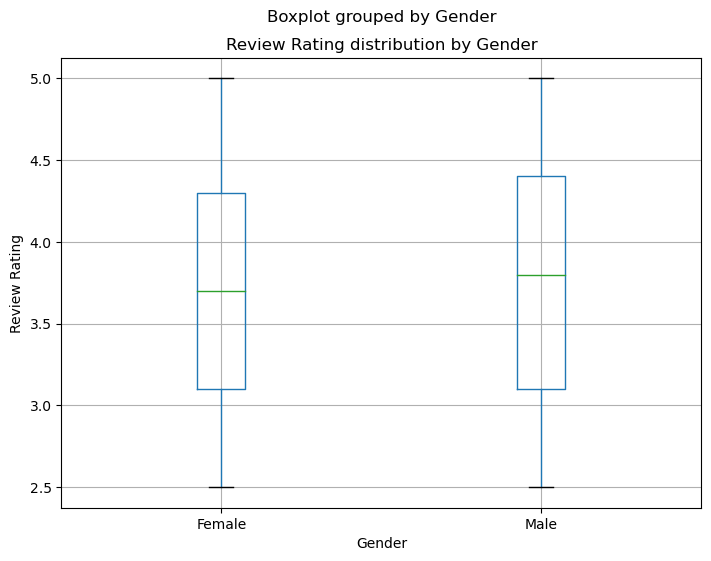

In [24]:
data.boxplot(column = 'Review Rating', by = 'Gender',figsize = (8,6))
plt.xlabel('Gender')
plt.ylabel('Review Rating')
plt.title('Review Rating distribution by Gender')
plt.show()

## Top 2 categories with the highest average purchase amounts

In [25]:
data.groupby(['Category'])['Purchase Amount (USD)'].mean().sort_values(ascending = False).head(2).reset_index()

,Category,Purchase Amount (USD)
0,Footwear,60.255426
1,Clothing,60.025331


## Top 2 categories with the lowest average purchase amounts

In [26]:
data.groupby(['Category'])['Purchase Amount (USD)'].mean().sort_values(ascending = False).tail(2).reset_index()

,Category,Purchase Amount (USD)
0,Accessories,59.83871
1,Outerwear,57.17284


In [27]:
data.sort_values('Review Rating', ascending = False )
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## The proportion of subscription status category 

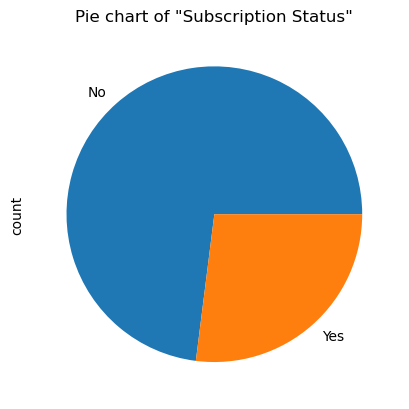

In [22]:
data['Subscription Status'].value_counts().plot(kind = 'pie')
plt.title('Pie chart of "Subscription Status"')
plt.show()

## Which colors are most popular with customers?

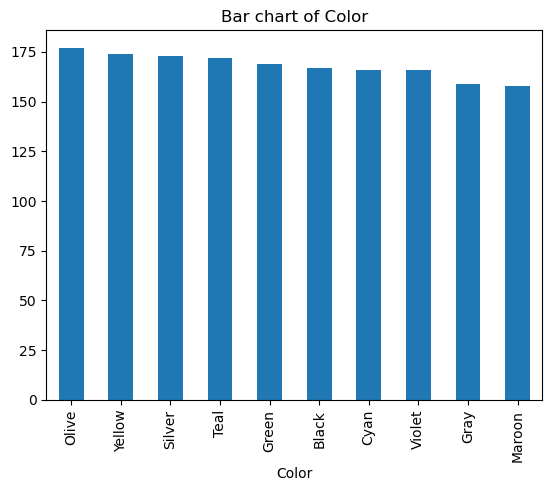

In [153]:
data['Color'].value_counts().head(10).plot(kind = 'bar')
plt.ylabel('')
plt.title('Bar chart of Color')
plt.show()

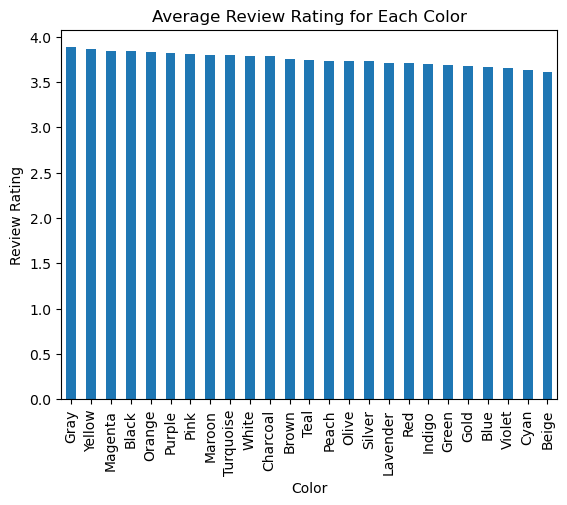

In [23]:
data.groupby('Color')['Review Rating'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Color')
plt.ylabel('Review Rating')
plt.title('Average Review Rating for Each Color')
plt.show()


## Is there any correlation between the number of previous purchases and the review ratings 

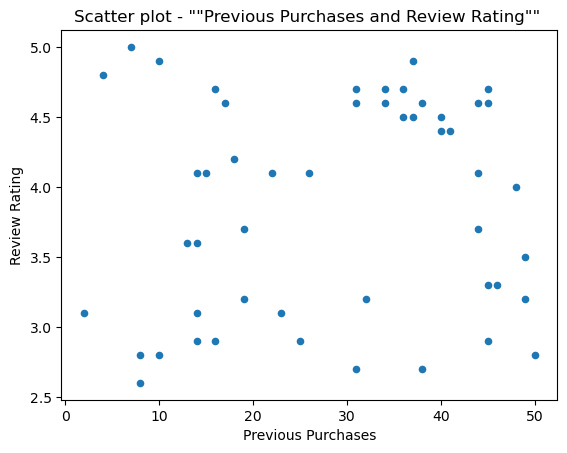

In [83]:
data.head(50).plot( x = 'Previous Purchases' , y = 'Review Rating', kind = 'scatter' )
plt.title('Scatter plot - ""Previous Purchases and Review Rating"" ')
plt.show()

## Total Revenue by Season

In [159]:
data.groupby(['Season'])['Purchase Amount (USD)'].sum().reset_index()

,Season,Purchase Amount (USD)
0,Fall,60018
1,Spring,58679
2,Summer,55777
3,Winter,58607


## Average Review Rating by Season

In [160]:
data.groupby(['Season'])['Review Rating'].mean().reset_index()

,Season,Review Rating
0,Fall,3.729949
1,Spring,3.790591
2,Summer,3.725654
3,Winter,3.752111


## Amount of Purchases in Each Season

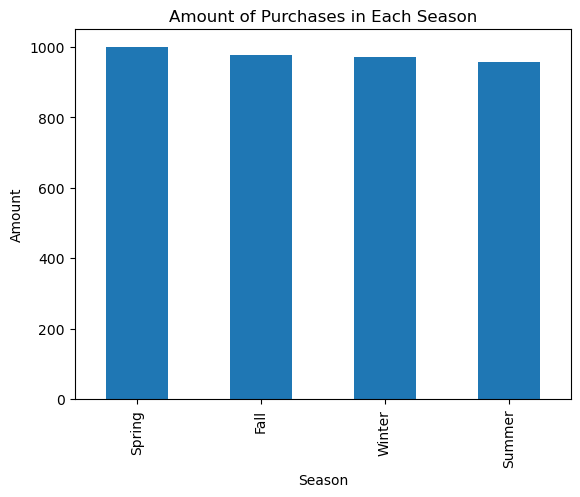

In [117]:
data['Season'].value_counts().plot(kind= 'bar')
plt.xlabel('Season')
plt.ylabel('Amount')
plt.title('Amount of Purchases in Each Season')
plt.show()

## Spending Behavior variation concerning different Frequencies of Purchases.

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

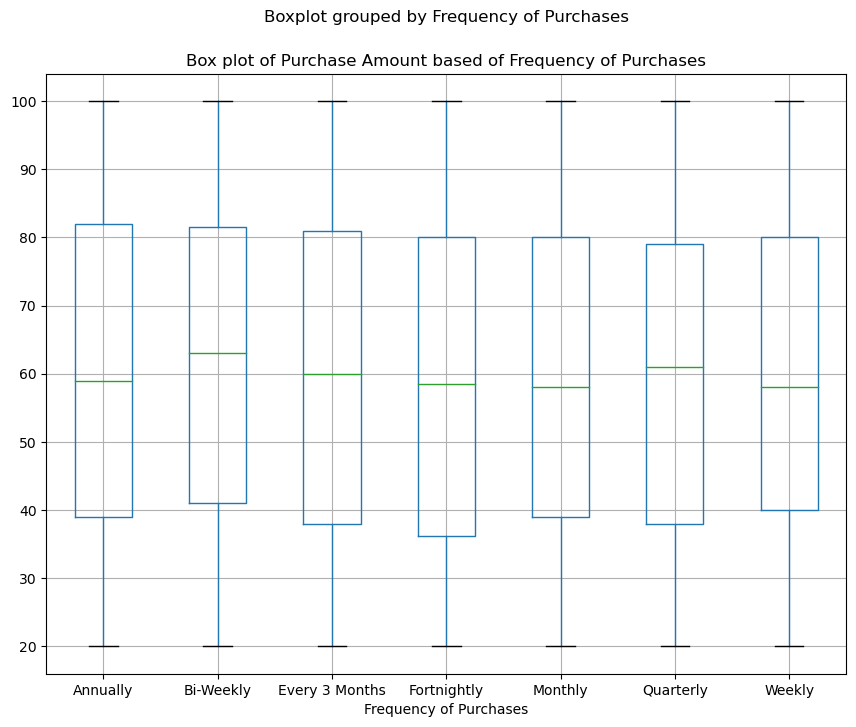

In [28]:
data.boxplot(column = 'Purchase Amount (USD)', by = 'Frequency of Purchases', figsize = (10,8))
plt.title('Box plot of Purchase Amount based of Frequency of Purchases')
plt.ylable('Purchase Amount (USD)')
plt.show()

## Top 3 most popular payment methods

In [161]:
data['Preferred Payment Method'].value_counts().sort_values(ascending = False).head(3).reset_index()

,Preferred Payment Method,count
0,PayPal,677
1,Credit Card,671
2,Cash,670


## Top 3 least popular payment methods

In [163]:
data['Preferred Payment Method'].value_counts().sort_values(ascending = False).tail(3).reset_index()

,Preferred Payment Method,count
0,Debit Card,636
1,Venmo,634
2,Bank Transfer,612


## Total Purchase Amount by Payment Method

In [162]:
data.groupby('Preferred Payment Method')['Purchase Amount (USD)'].sum().sort_values(ascending = False).reset_index()

,Preferred Payment Method,Purchase Amount (USD)
0,Credit Card,40310
1,PayPal,40109
2,Cash,40002
3,Debit Card,38742
4,Venmo,37374
5,Bank Transfer,36544


## Average Purchase Amounts concerning different Items Purchased across various locations

In [102]:
pd.pivot_table(data, values = 'Purchase Amount (USD)', index = 'Location', columns = 'Item Purchased', aggfunc = 'mean').head(10)

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.00,26.500000,52.000000,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.200000,54.333333,49.000000,68.666667,79.500000,93.500000,62.666667,40.500000,52.500000
Alaska,74.60,76.750000,67.500000,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.500000,80.000000,76.666667,87.333333,73.333333,74.250000,83.000000,50.333333,56.750000
Arizona,48.60,84.500000,61.000000,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.000000,87.000000,46.000000,68.500000,78.500000,61.000000,66.000000,70.400000,62.000000
Arkansas,90.00,55.000000,66.000000,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.000000,59.500000,95.000000,44.500000,69.000000,60.500000,56.000000,71.500000,52.000000
California,57.40,61.666667,39.500000,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.800000,NaN,63.333333,56.000000,73.000000,83.000000,69.400000,42.000000,69.000000
Colorado,57.00,68.500000,55.000000,NaN,46.000000,39.750000,64.500000,51.250000,61.333333,50.500000,...,68.000000,64.500000,67.500000,95.000000,41.200000,53.500000,NaN,34.000000,58.000000,59.000000
Connecticut,60.00,47.666667,67.400000,64.250000,44.500000,65.000000,63.000000,53.500000,22.000000,63.000000,...,68.250000,62.333333,51.750000,59.500000,54.000000,NaN,61.000000,43.000000,NaN,39.000000
Delaware,33.00,41.500000,42.200000,44.500000,57.500000,46.000000,72.200000,51.000000,57.400000,79.333333,...,54.000000,45.333333,58.200000,43.000000,66.000000,39.500000,80.000000,45.500000,35.000000,66.666667
Florida,59.00,94.000000,31.000000,51.500000,51.166667,48.500000,51.666667,67.000000,54.000000,64.250000,...,58.500000,66.333333,26.000000,89.500000,44.500000,64.000000,33.500000,59.000000,56.000000,56.000000


## Amount of Category by Color

In [164]:
data.groupby('Color')['Category'].value_counts().reset_index()

,Color,Category,count
0,Beige,Clothing,65
1,Beige,Accessories,44
2,Beige,Footwear,24
3,Beige,Outerwear,14
4,Black,Clothing,81
...,...,...,...
95,White,Outerwear,15
96,Yellow,Clothing,75
97,Yellow,Accessories,56
98,Yellow,Footwear,30


## Distribution of Purchases by Category

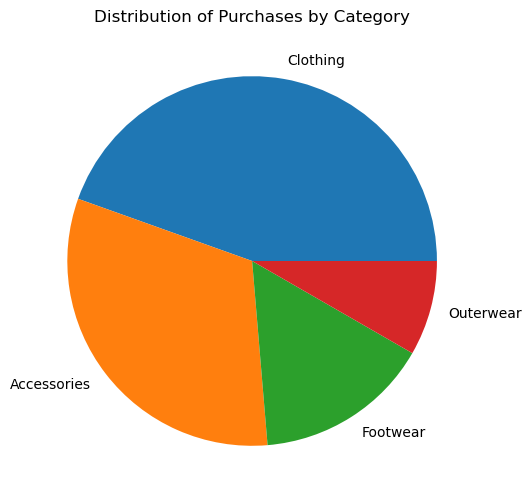

In [146]:

plt.figure(figsize = (10,6))
data['Category'].value_counts().plot(kind = 'pie')
plt.ylabel('')
plt.title('Distribution of Purchases by Category')
plt.show()
